# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 7</span>

L'esercitazione è incentrata sulla simulazione di un sistema di $N$ particelle, classico fluido di Lennard-Jones come nella quarta esercitazione, tramite l'**algoritmo di Metropolis**

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

### Esercizio 7.1

Col codice Monte Carlo fornito ho stampato i valori istantanei ($10^5$ MC steps) di energia potenziale per particella, $U/N$, e pressione, $P$, per le tre condizioni termodinamiche corrispondenti alle 3 fasi del sistema:

- fase solida: $T^*=0.8$, $\rho^*=1.1$, $r_c=2.2$
- fase liquida: $T^*=1.1$, $\rho^*=0.8$, $r_c=2.5$
- fase gassosa: $T^*=1.2$, $\rho^*=0.05$, $r_c=5$

In [23]:
# Load data
y_epot_sol = np.loadtxt("../results/solid/instant_epot_pres_solid.dat", unpack = True, usecols = 0)
y_pres_sol = np.loadtxt("../results/solid/instant_epot_pres_solid.dat", unpack = True, usecols = 1)

y_epot_liq = np.loadtxt("../results/liquid/instant_epot_pres_liquid.dat", unpack = True, usecols = 0)
y_pres_liq = np.loadtxt("../results/liquid/instant_epot_pres_liquid.dat", unpack = True, usecols = 1)

y_epot_gas = np.loadtxt("../results/gas/instant_epot_pres_gas.dat", unpack = True, usecols = 0)
y_pres_gas = np.loadtxt("../results/gas/instant_epot_pres_gas.dat", unpack = True, usecols = 1)

### Tempo di correlazione di $U/N$ e $P$

Il primo obiettivo della lezione è scrivere uno script python per stimare il tempo di correlazione della simulazione Monte Carlo per le quantità $U/N$ e $P$.

In [24]:
def autocorrelation(series, lag):
    n = len(series)
    mean = 0.
    for x in series:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - lag):
        c += (series[i] - mean)*(series[i + lag] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (series[i] - mean)*(series[i] - mean)

    return (c / n)/(autocovariance/n)

def exp_fit(t, t0):
    return np.exp(-t / t0)

Correlation time of pressure [solid phase]:  8.385795625610227
Correlation time of U/N [solid phase]:  8.529721235555026

Correlation time of pressure [liquid phase]:  12.053965999543685
Correlation time of U/N [liquid phase]:  9.131686554971383

Correlation time of pressure [gaseous phase]:  0.8780349488982918
Correlation time of U/N [gaseous phase]:  2.6878433966610933


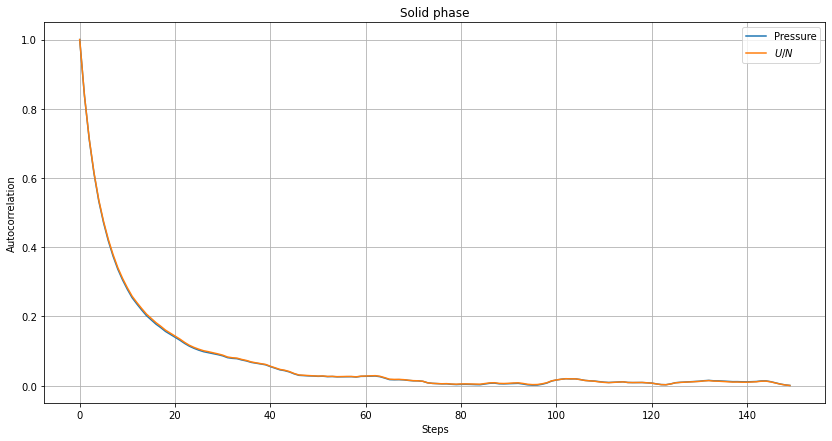

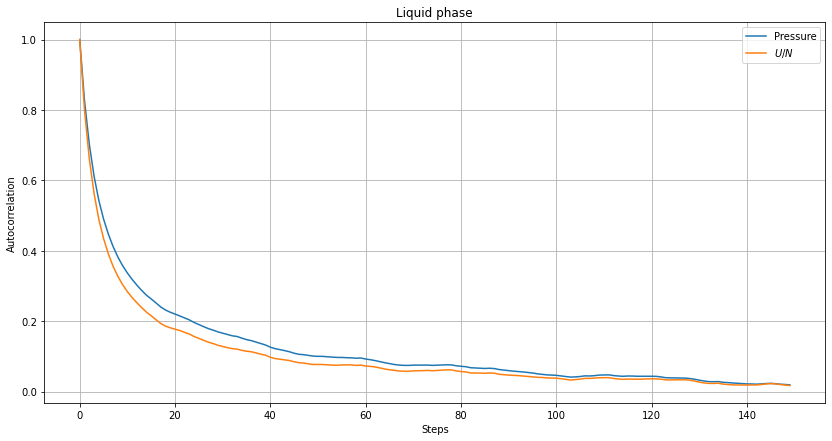

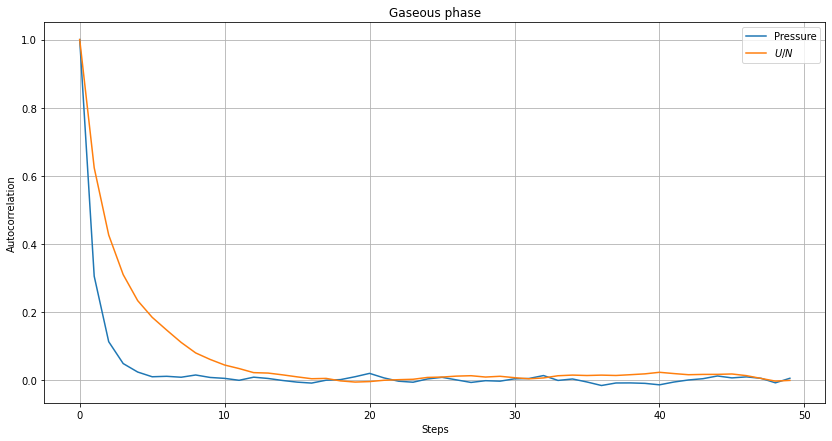

In [25]:
# Print correlation times
corr_pres_sol = [autocorrelation(y_pres_sol, t) for t in np.arange(150)]
corr_epot_sol = [autocorrelation(y_epot_sol, t) for t in np.arange(150)]

corr_lenght_pres_sol, var_pres_sol = optimize.curve_fit(exp_fit, np.arange(150), corr_pres_sol)
corr_lenght_epot_sol, var_epot_sol = optimize.curve_fit(exp_fit, np.arange(150), corr_epot_sol)

print("Correlation time of pressure [solid phase]: ", corr_lenght_pres_sol[0])
print("Correlation time of U/N [solid phase]: ", corr_lenght_epot_sol[0])
print()

corr_pres_liq = [autocorrelation(y_pres_liq, t) for t in np.arange(150)]
corr_epot_liq = [autocorrelation(y_epot_liq, t) for t in np.arange(150)]

corr_lenght_pres_liq, var_pres_liq = optimize.curve_fit(exp_fit, np.arange(150), corr_pres_liq)
corr_lenght_epot_liq, var_epot_liq = optimize.curve_fit(exp_fit, np.arange(150), corr_epot_liq)

print("Correlation time of pressure [liquid phase]: ", corr_lenght_pres_liq[0])
print("Correlation time of U/N [liquid phase]: ", corr_lenght_epot_liq[0])
print()

corr_pres_gas = [autocorrelation(y_pres_gas, t) for t in np.arange(50)]
corr_epot_gas = [autocorrelation(y_epot_gas, t) for t in np.arange(50)]

corr_lenght_pres_gas, var_pres_gas = optimize.curve_fit(exp_fit, np.arange(50), corr_pres_gas)
corr_lenght_epot_gas, var_epot_gas = optimize.curve_fit(exp_fit, np.arange(50), corr_epot_gas)

print("Correlation time of pressure [gaseous phase]: ", corr_lenght_pres_gas[0])
print("Correlation time of U/N [gaseous phase]: ", corr_lenght_epot_gas[0])

# Plot autocorrelation as a function of steps
plt.figure(1, figsize = (14, 7))
plt.plot(corr_pres_sol, label="Pressure")
plt.plot(corr_epot_sol, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
plt.plot(corr_pres_liq, label="Pressure")
plt.plot(corr_epot_liq, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

plt.figure(3, figsize = (14, 7))
plt.plot(corr_pres_gas, label="Pressure")
plt.plot(corr_epot_gas, label="$U/N$")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

plt.show()

Dal calcolo dei tempi di correlazione possiamo osservare che se desideriamo un quantitativo ragionevole di misure indipendenti delle nostre osservabili in ogni blocco, dovremo eseguire $N_{MCsteps}=N_{obs/blk}\times2\times t_{corr}$ step Monte Carlo. Supponendo di volere $20$ misure indipendenti per blocco ottengo:

In [26]:

print("Monte Carlo steps - Pressure [solid phase] = ", 20*2*corr_lenght_pres_sol[0])
print("Monte Carlo steps - E pot [solid phase] = ", 20*2*corr_lenght_epot_sol[0])
print()
print("Monte Carlo steps - Pressure [liquid phase] = ", 20*2*corr_lenght_pres_liq[0])
print("Monte Carlo steps - E pot [liquid phase] = ", 20*2*corr_lenght_epot_liq[0])
print()
print("Monte Carlo steps - Pressure [gaseous phase] = ", 20*2*corr_lenght_pres_gas[0])
print("Monte Carlo steps - E pot [gaseous phase] = ", 20*2*corr_lenght_epot_gas[0])

Monte Carlo steps - Pressure [solid phase] =  335.4318250244091
Monte Carlo steps - E pot [solid phase] =  341.1888494222011

Monte Carlo steps - Pressure [liquid phase] =  482.1586399817474
Monte Carlo steps - E pot [liquid phase] =  365.2674621988553

Monte Carlo steps - Pressure [gaseous phase] =  35.12139795593167
Monte Carlo steps - E pot [gaseous phase] =  107.51373586644374


### Incertezza statistica in funzione del numero di blocchi

Ho dunque scritto un altro script per elaborare gli stessi dati ed ottenere una stima dell'incertezza statistica in funzione della grandezza dei blocchi usata nella tecnica di calcolo dell'incertezza. 
Riporto di seguito i grafici delle incertezze in funzione della grandezza dei blocchi $L=M/N$ nel range $[10; 5\times 10^3]$, con $N$ numero di blocchi.

In [27]:
def get_error(x, blk_len):
    mc_step=len(x)
    n_blks=int(mc_step/blk_len)
    glob_avg=0
    glob_avg2=0

    for i in range(n_blks):
        blk_avg=0
        for j in range(blk_len):
            blk_avg += x[j+blk_len*i]
        blk_avg /= blk_len

        glob_avg += blk_avg
        glob_avg2 += (blk_avg*blk_avg)

    return np.sqrt((glob_avg2/n_blks-(glob_avg/n_blks)**2)/n_blks)

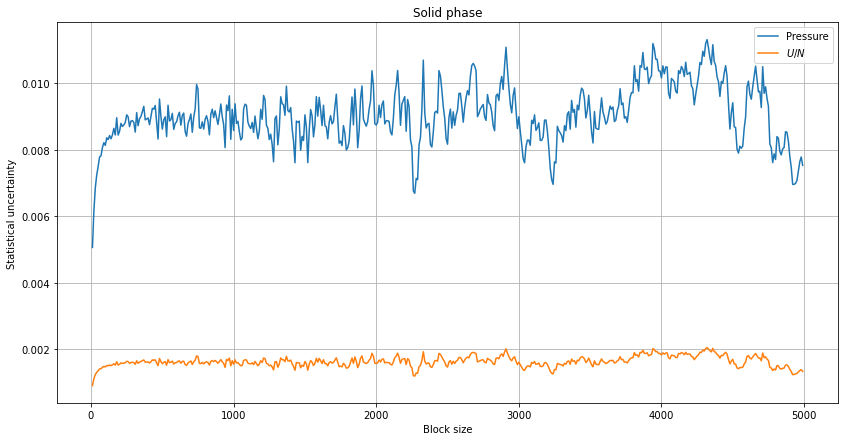

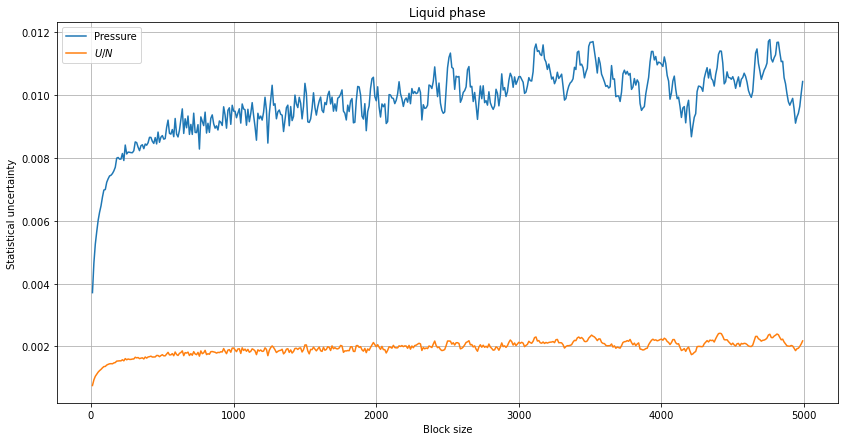

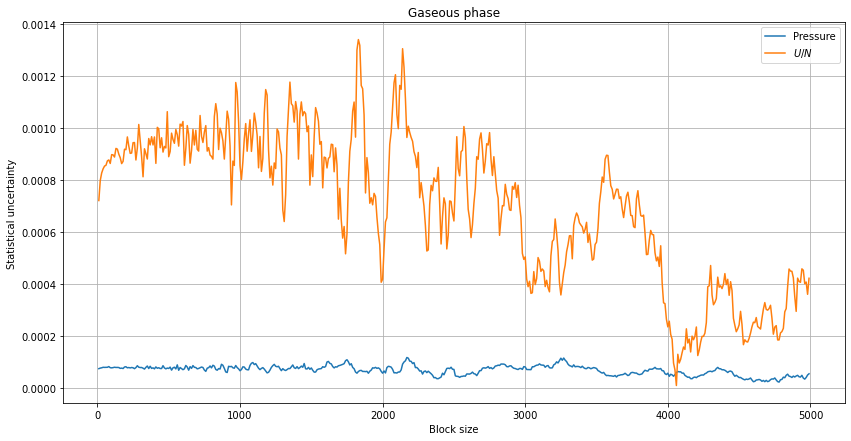

In [28]:
# Solid phase
plt.figure(1, figsize = (14, 7))
vec_pres_sol=[]
vec_epot_sol=[]

for blk_len in range(10, 5000, 10):
    err_pres_sol = get_error(y_pres_sol, blk_len)
    err_epot_sol = get_error(y_epot_sol, blk_len)

    vec_pres_sol.append(err_pres_sol)
    vec_epot_sol.append(err_epot_sol)

plt.plot(range(10, 5000, 10), vec_pres_sol, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_sol, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Solid phase')
plt.grid(True)
plt.legend()

# Liquid phase
plt.figure(2, figsize = (14, 7))
vec_pres_liq=[]
vec_epot_liq=[]

for blk_len in range(10, 5000, 10):
    err_pres_liq = get_error(y_pres_liq, blk_len)
    err_epot_liq = get_error(y_epot_liq, blk_len)

    vec_pres_liq.append(err_pres_liq)
    vec_epot_liq.append(err_epot_liq)

plt.plot(range(10, 5000, 10), vec_pres_liq, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_liq, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Liquid phase')
plt.grid(True)
plt.legend()

# Gaseous phase
plt.figure(3, figsize = (14, 7))
vec_pres_gas=[]
vec_epot_gas=[]

for blk_len in range(10, 5000, 10):
    err_pres_gas = get_error(y_pres_gas, blk_len)
    err_epot_gas = get_error(y_epot_gas, blk_len)

    vec_pres_gas.append(err_pres_gas)
    vec_epot_gas.append(err_epot_gas)

plt.plot(range(10, 5000, 10), vec_pres_gas, label="Pressure")
plt.plot(range(10, 5000, 10), vec_epot_gas, label="$U/N$")
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.title('Gaseous phase')
plt.grid(True)
plt.legend()

plt.show()

In tutti i casi osservo una crescita rapida ad un valore stazionario d'incertezza. Se si utilizzano blocchi troppo piccoli l'incertezza viene sottostimata, tuttavia superata una certa grandezza non si ha più alcun miglioramento, anzi, l'incertezza diventa sempre più instabile poichè vista la grandezza dei blocchi il loro numero diminuisce.

### Esercizio 7.4

Dopo aver implementato il calcolo della funzione di distribuzione radiale $g(r)$ nel codice Monte Carlo, ho eseguito le simulazioni per le 3 fasi dell'Argon. Di seguito riporto i valori, con relativa incertezza statistica, ottenuti per l'energia potenziale per particella $U/N$, per la pressione $P$ e per la funzione radiale $g(r)$, in unità del SI.

I risultati ottenuti per le $g(r)$ sono confrontati con quelli ottenuti con le simulazioni di dinamica molecolare NVE in condizioni termodinamiche simili.
Di seguito riporto i risultati.

In [33]:
# SI conversion
k_b=1.380649e-23
a_m_u=1.66054e-27

sigma_ar=0.34e-9
epsilon_ar=120.*k_b
m_ar=39.948*a_m_u

delta=0.0005

time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)

**Fase solida**

I parametri utilizzati perla simulazione sono:

- $108$ particelle
- $500$ step di calibrazione
- $100$ blocchi
- $600$ step per blocco
- MC step di $0.12$, per ottenere valori di accettazione attorno al $50\%$
- $T^*=0.8$
- $\rho^*=1.1$
- $r_c=2.2$

Osservando lo studio precedente posso ipotizzare che usando $600$ step per blocco si raggiunga il valore di incertezza statistica corretto e si ottengano circa $40$ misure indipendenti sia per pressione che per energia potenziale.

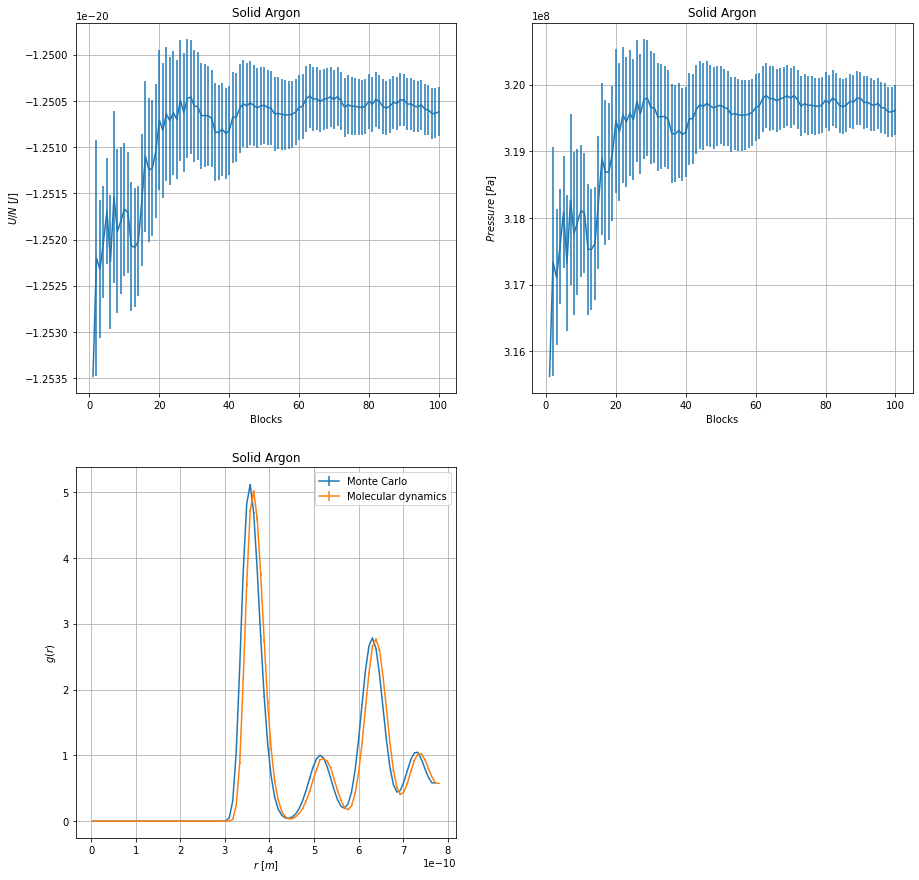

In [30]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("../results/solid/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("../results/solid/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("../results/solid/output.gave.0", unpack = True, usecols = (1,2,3))
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("../../NSL-04/results/solid/ave_g.out", unpack = True)

# Change units
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

# Plot graphs
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)

plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(2, 2, 2)

plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(2, 2, 3)

plt.title("Solid Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar[:-1], y_s_gave_mc[:-1], yerr_s_gave_mc[:-1], label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.show()

**Fase liquida**

Per la fase liquida ho mantenuto i parametri precedenti eccetto:

- $1000$ step per blocco
- $T^*=1.1$
- $\rho^*=0.8$
- $r_c=2.5$

Osservando lo studio precedente posso ipotizzare che usando $1000$ step per blocco si raggiunga il valore di incertezza statistica corretto e si ottengano circa $40$ misure indipendenti sia per pressione che per energia potenziale.


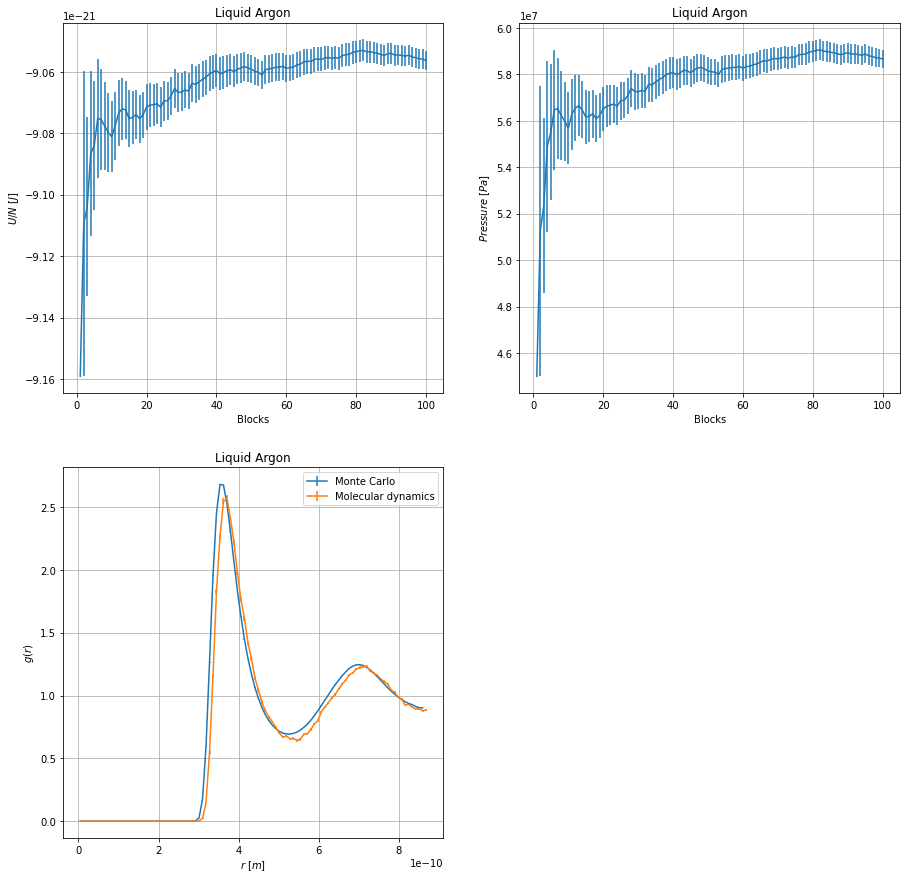

In [31]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("../results/liquid/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("../results/liquid/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("../results/liquid/output.gave.0", unpack = True, usecols = (1,2,3))
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("../../NSL-04/results/liquid/ave_g.out", unpack = True)

# Change units
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

# Plot graphs
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)

plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(2, 2, 2)

plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(2, 2, 3)

plt.title("Liquid Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar[:-1], y_s_gave_mc[:-1], yerr_s_gave_mc[:-1], label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.show()

**Fase gassosa**

Per la fase liquida ho mantenuto i parametri precedenti eccetto:

- $1000$ step per blocco
- $T^*=1.2$
- $\rho^*=0.05$
- $r_c=5$

Osservando lo studio precedente posso ipotizzare che usando $200$ step per blocco si raggiunga il valore di incertezza statistica corretto e si ottengano circa $40$ misure indipendenti sia per pressione che per energia potenziale.

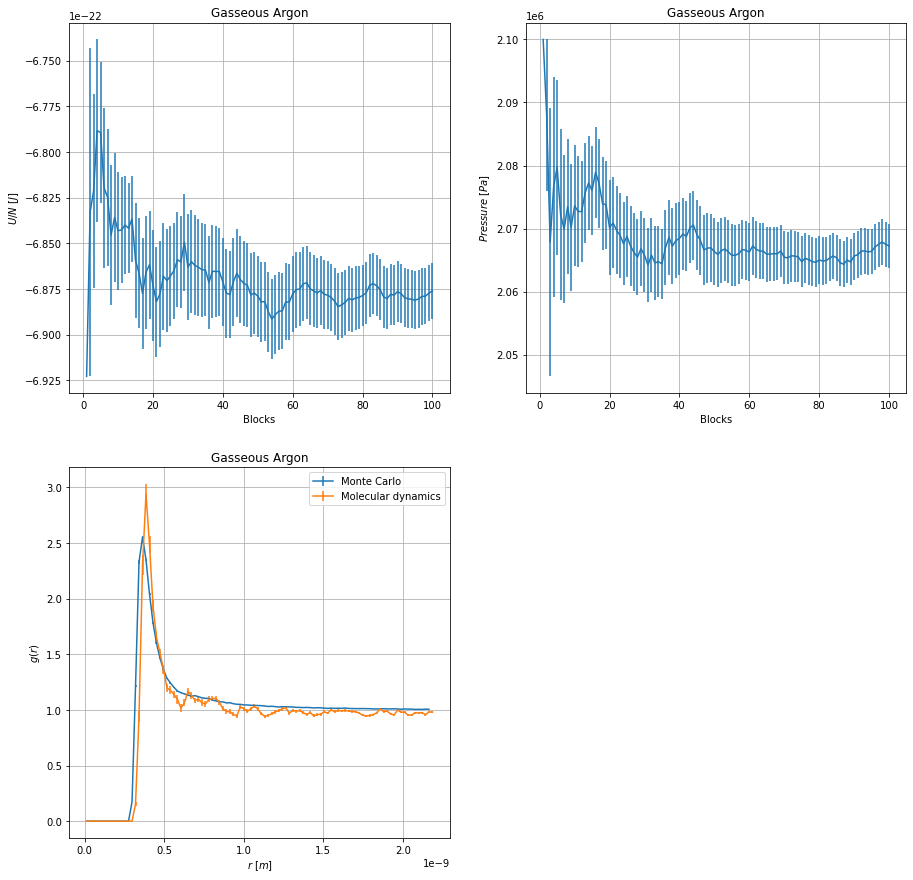

In [32]:
x_s_epot, y_s_epot, yerr_s_epot = np.loadtxt("../results/gas/output.epot.0", unpack = True, usecols = (0,2,3))
x_s_pres, y_s_pres, yerr_s_pres = np.loadtxt("../results/gas/output.pres.0", unpack = True, usecols = (0,2,3))
x_s_gave_mc, y_s_gave_mc, yerr_s_gave_mc = np.loadtxt("../results/gas/output.gave.0", unpack = True, usecols = (1,2,3))
x_s_gave_md, y_s_gave_md, yerr_s_gave_md = np.loadtxt("../../NSL-04/results/gas/ave_g.out", unpack = True)

# Change units
y_s_epot_ar=y_s_epot*epsilon_ar
y_s_pres_ar=y_s_pres*epsilon_ar/(sigma_ar**3)

yerr_s_epot_ar=yerr_s_epot*epsilon_ar
yerr_s_pres_ar=yerr_s_pres*epsilon_ar/(sigma_ar**3)

x_s_gave_mc_ar=x_s_gave_mc*sigma_ar
x_s_gave_md_ar=x_s_gave_md*sigma_ar

# Plot graphs
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)

plt.title("Gasseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(x_s_epot, y_s_epot_ar, yerr_s_epot_ar)
plt.grid(True)

plt.subplot(2, 2, 2)

plt.title("Gasseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(x_s_pres, y_s_pres_ar, yerr_s_pres_ar)
plt.grid(True)

plt.subplot(2, 2, 3)

plt.title("Gasseous Argon")
plt.xlabel('$r$ $[m]$')
plt.ylabel('$g(r)$')
plt.errorbar(x_s_gave_mc_ar[:-1], y_s_gave_mc[:-1], yerr_s_gave_mc[:-1], label = "Monte Carlo")
plt.errorbar(x_s_gave_md_ar, y_s_gave_md, yerr_s_gave_md, label = "Molecular dynamics")
plt.grid(True)
plt.legend()

plt.show()


I risultati ottenuti per energia e pressione sono compatibili con quelli di dinamica molecolare ed il confronto delle funzioni $g(r)$ mostra un buon accordo trai due diversi metodi.